In [1]:
#Find dataset at https://https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, FactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
fraud_df = pd.read_csv('creditcard.csv')
fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
y = fraud_df['Class']
X = fraud_df.drop(['Class'], axis=1)

In [5]:
#Scale Data
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

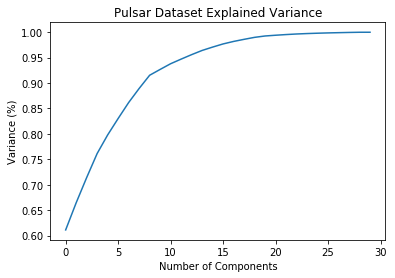

[0.61105859 0.66438799 0.71401509 0.76137723 0.79793098 0.83028277
 0.8616462  0.88935797 0.91535941 0.92683191 0.93804775 0.94712546
 0.95592302 0.96417037 0.9707874  0.97700596 0.98191284 0.9860508
 0.98994971 0.9926439  0.99411179 0.99543074 0.99656446 0.9974099
 0.99809889 0.99868717 0.99916127 0.99960571 0.99996501 1.        ]


In [6]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_scaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()
print(np.cumsum(pca.explained_variance_ratio_))

In [7]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

In [8]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=11)

In [10]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [11]:
y_train.value_counts()

0    199031
1       333
Name: Class, dtype: int64

In [12]:
y_test.value_counts()

0    85284
1      159
Name: Class, dtype: int64

In [13]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)
"""
# RandomOverSampler
  # With over-sampling methods, the number of samples in a class
  # should be greater or equal to the original number of samples.
sampler = RandomOverSampler(random_state=11)
X_rs, y_rs = sampler.fit_sample(X_train, y_train)
"""
# SMOTE
sampler = SMOTE(random_state=11)
X_rs, y_rs = sampler.fit_sample(X_train, y_train)
"""
# ADASYN
sampler = ADASYN(random_state=11)
X_rs, y_rs = sampler.fit_sample(X_train, y_train)
"""

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\zacha\AppData\Local\Continuum\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


'\n# ADASYN\nsampler = ADASYN(random_state=11)\nX_rs, y_rs = sampler.fit_sample(X_train, y_train)\n'

In [14]:
y_rs.value_counts()

1    199031
0    199031
Name: Class, dtype: int64

In [15]:
X_train, y_train = X_rs, y_rs

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)
test_predictions1 = clf1.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix


def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        print(cm)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

[[85263    21]
 [   33   126]]


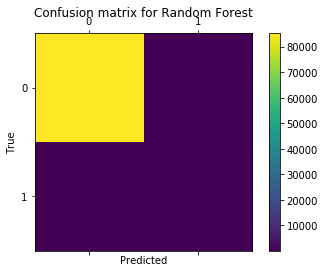

In [18]:
class_names = np.unique(np.array(y_test))
confusion_matrices = [
    #( "Support Vector Machines", confusion_matrix(y,run_cv(X,y,SVC)) ),
    ( "Random Forest", confusion_matrix(y_test, test_predictions1)),
    #( "K-Nearest-Neighbors", confusion_matrix(y,run_cv(X,y,KNN)) ),
    #( "Gradient Boosting Classifier", confusion_matrix(y,run_cv(X,y,GBC)) ),
    #( "Logisitic Regression", confusion_matrix(y,run_cv(X,y,LR)) )
]
draw_confusion_matrices(confusion_matrices,class_names)

Feature ranking:
1. Time (0.047176)
2. V1 (0.038403)
3. V2 (0.037373)
4. V3 (0.012442)
5. V4 (0.012218)
6. V5 (0.010487)
7. V6 (0.009811)
8. V7 (0.009606)
9. V8 (0.008295)
10. V9 (0.007813)


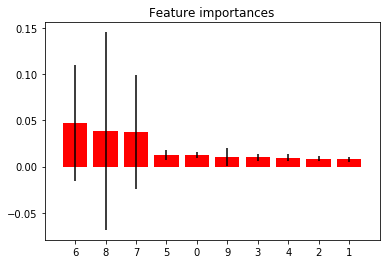

In [19]:
importances = clf1.feature_importances_[:10]
std = np.std([tree.feature_importances_ for tree in clf1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

features = X.columns

for f in range(10):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
#import pylab as pl
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()

KNeighborsClassifier
****Results****
F-score: 68.6486%
Log Loss: 0.046891673138745836
Recall: 0.7987421383647799
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85284
           1       0.60      0.80      0.69       159

    accuracy                           1.00     85443
   macro avg       0.80      0.90      0.84     85443
weighted avg       1.00      1.00      1.00     85443

[[85200    84]
 [   32   127]]


C:\Users\zacha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\zacha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


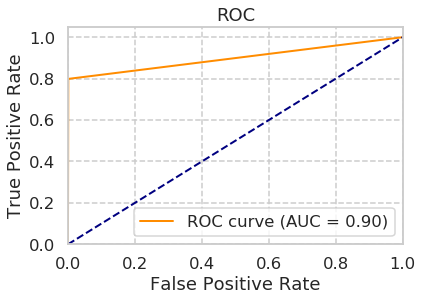

DecisionTreeClassifier
****Results****
F-score: 58.1986%
Log Loss: 0.07316733808385224
Recall: 0.7924528301886793
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85284
           1       0.46      0.79      0.58       159

    accuracy                           1.00     85443
   macro avg       0.73      0.90      0.79     85443
weighted avg       1.00      1.00      1.00     85443

[[85136   148]
 [   33   126]]


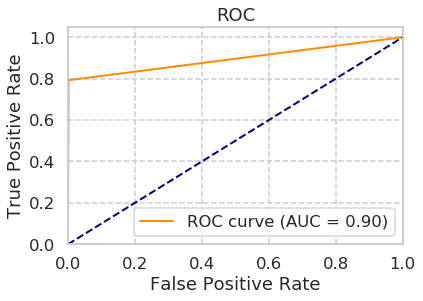

RandomForestClassifier
****Results****
F-score: 81.9672%
Log Loss: 0.022232944691387323
Recall: 0.7861635220125787
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85284
           1       0.86      0.79      0.82       159

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85263    21]
 [   34   125]]


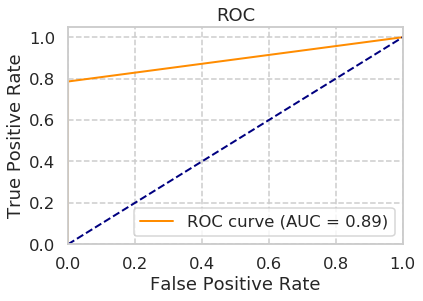

AdaBoostClassifier
****Results****
F-score: 12.9483%
Log Loss: 0.7555265093423283
Recall: 0.8742138364779874
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85284
           1       0.07      0.87      0.13       159

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

[[83435  1849]
 [   20   139]]


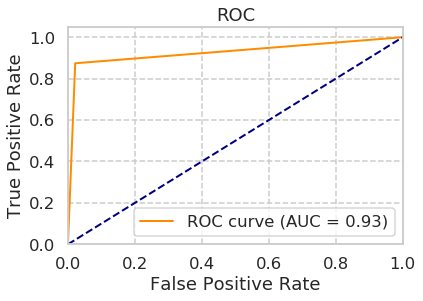

GradientBoostingClassifier
****Results****
F-score: 24.7978%
Log Loss: 0.3383496402753106
Recall: 0.8679245283018868
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85284
           1       0.14      0.87      0.25       159

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.62     85443
weighted avg       1.00      0.99      0.99     85443

[[84468   816]
 [   21   138]]


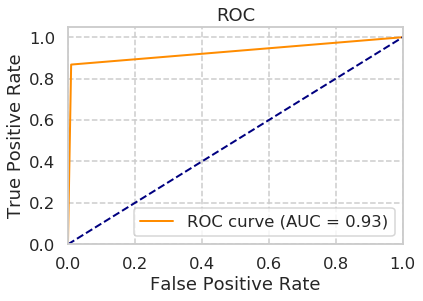

GaussianNB
****Results****
F-score: 15.9464%
Log Loss: 0.5582567566295048
Recall: 0.8238993710691824
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85284
           1       0.09      0.82      0.16       159

    accuracy                           0.98     85443
   macro avg       0.54      0.90      0.58     85443
weighted avg       1.00      0.98      0.99     85443

[[83931  1353]
 [   28   131]]


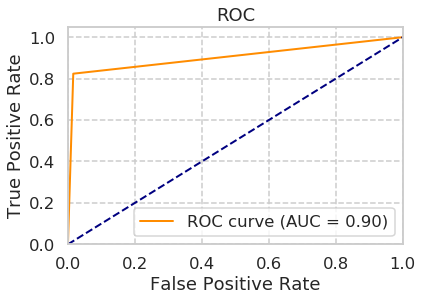

LinearDiscriminantAnalysis
****Results****
F-score: 19.2696%
Log Loss: 0.420006220171719
Recall: 0.779874213836478
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85284
           1       0.11      0.78      0.19       159

    accuracy                           0.99     85443
   macro avg       0.55      0.88      0.59     85443
weighted avg       1.00      0.99      0.99     85443

[[84280  1004]
 [   35   124]]


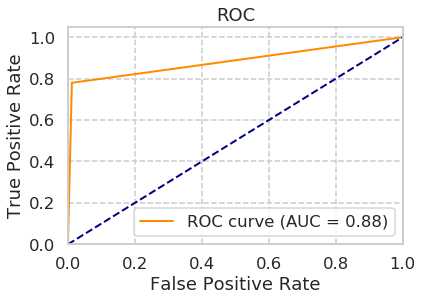

QuadraticDiscriminantAnalysis
****Results****
F-score: 11.9982%
Log Loss: 0.8064608653017711
Recall: 0.8553459119496856
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85284
           1       0.06      0.86      0.12       159

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443

[[83312  1972]
 [   23   136]]


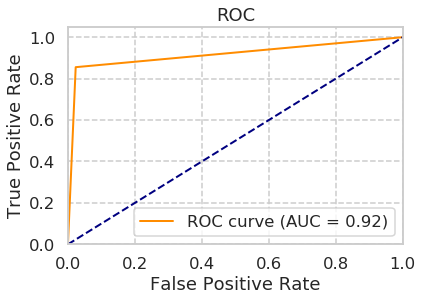

In [20]:
from sklearn.metrics import accuracy_score, log_loss, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns


classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "F-score", "Log Loss", "Recall"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    test_predictions = clf.predict(X_test)
    acc = f1_score(y_test, test_predictions)
    print("F-score: {:.4%}".format(acc))
       
    ll = log_loss(y_test, test_predictions)
    print("Log Loss: {}".format(ll))
    
    rc = recall_score(y_test, test_predictions)
    print("Recall: {}".format(rc))
    
    #Print predictions and confution matrix
    report = classification_report(y_test, test_predictions)
    print(report)

    print(confusion_matrix(y_test, test_predictions))
    
    #ROC Curve
    sns.set('talk', 'whitegrid', 'dark', font_scale=1.0, font='Ricty',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

    fpr, tpr, _ = roc_curve(y_test, test_predictions)
    roc_auc = auc(fpr, tpr)

    lw = 2
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

    log_entry = pd.DataFrame([[name, acc*100, ll, rc]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

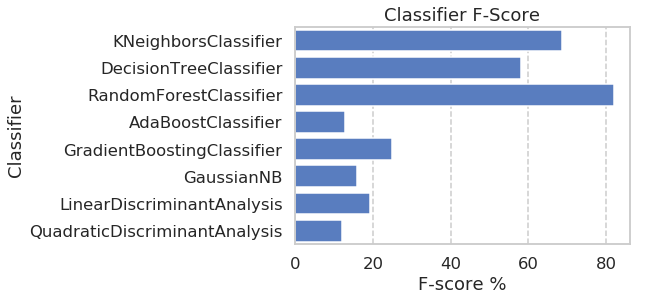

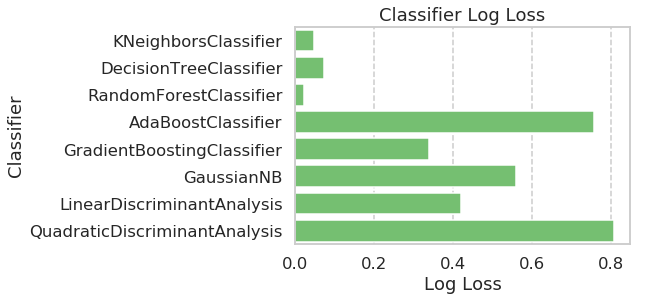

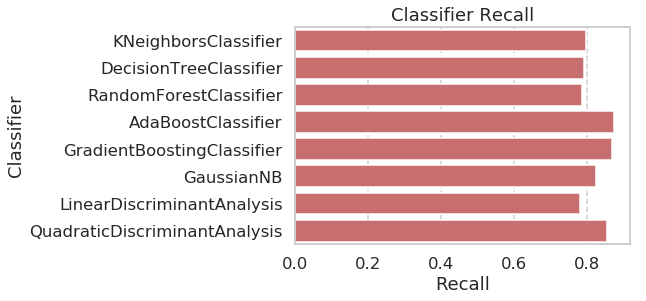

In [21]:
sns.set_color_codes("muted")
sns.barplot(x='F-score', y='Classifier', data=log, color="b")

plt.xlabel('F-score %')
plt.title('Classifier F-Score')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Recall', y='Classifier', data=log, color="r")

plt.xlabel('Recall')
plt.title('Classifier Recall')
plt.show()

